In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from glob import glob
import cv2
from tqdm.notebook import tqdm
import time
from datetime import datetime
import os
import torch
import multiprocessing as mp
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Model Results

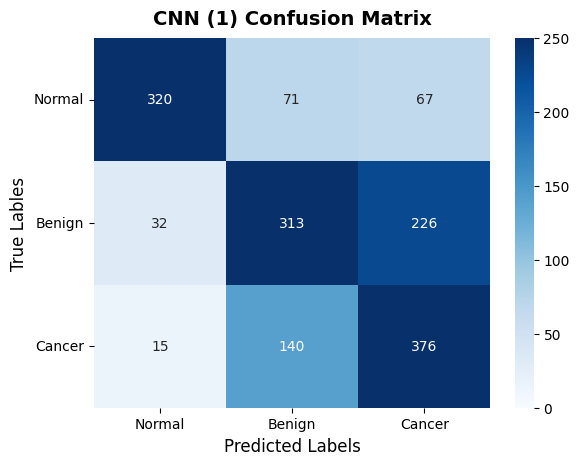

<Figure size 800x600 with 0 Axes>

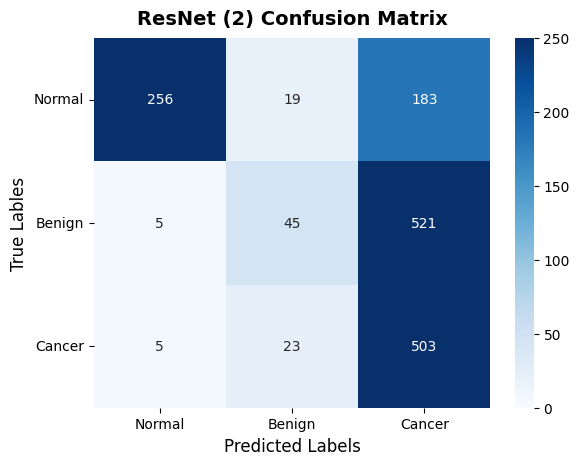

<Figure size 600x600 with 0 Axes>

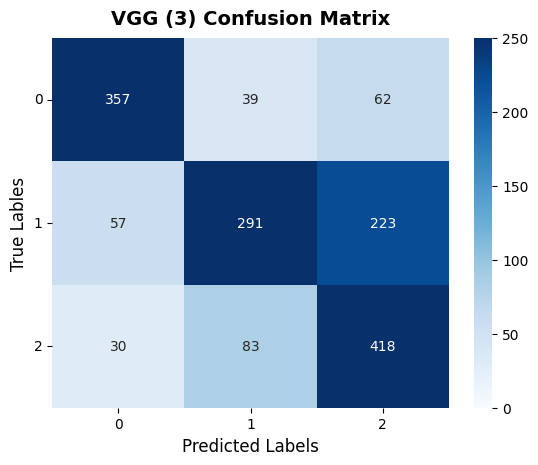

<Figure size 600x600 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
classes = { 'Normal': 0, 'Benign': 1, 'Cancer': 2}

######### 1 ##########
df = pd.read_csv('/content/drive/Shareddrives/COS429_Final_Project/df_cnn.csv')
y_pred = df['Prediction']
y_true = df['Label']

CMatrix = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=classes, index =classes)

ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted Labels',fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

plt.figure(figsize=(8, 6))
ax.set_ylabel('True Lables',fontsize = 12) 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('CNN (1) Confusion Matrix',fontsize = 14,weight = 'bold',pad=10)
plt.show()
######### 2 ##########
df = pd.read_csv('/content/drive/Shareddrives/COS429_Final_Project/df_resnet.csv')
y_pred = df['Prediction']
y_true = df['Label']

CMatrix = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=classes, index =classes)

ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues',cbar=True)
ax.set_xlabel('Predicted Labels',fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);
plt.figure(figsize=(6, 6))
ax.set_ylabel('True Lables',fontsize = 12) 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('ResNet (2) Confusion Matrix',fontsize = 14,weight = 'bold',pad=10);
plt.show()
######### 3 ##########
df = pd.read_csv('/content/drive/Shareddrives/COS429_Final_Project/df_vgg.csv')
y_pred = df['Prediction']
y_true = df['Label']
classes = np.unique(y_true)

CMatrix = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=classes, index=classes)

total = np.sum(CMatrix.values)
percents = (CMatrix / total).values.flatten()
annotations = [f'{value:d}\n{percent:.2%}' for value, percent in zip(CMatrix.values.flatten(), percents)]

ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues',cbar=True)
ax.set_xlabel('Predicted Labels',fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);
plt.figure(figsize=(6, 6))
ax.set_ylabel('True Lables',fontsize = 12) 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('VGG (3) Confusion Matrix', fontsize=14, weight='bold', pad=10)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# Load data and define classes
df_cnn = pd.read_csv('/content/drive/Shareddrives/COS429_Final_Project/df_cnn.csv')
df_resnet = pd.read_csv('/content/drive/Shareddrives/COS429_Final_Project/df_resnet.csv')
df_vgg = pd.read_csv('/content/drive/Shareddrives/COS429_Final_Project/df_vgg.csv')
# classes = ['Class1', 'Class2', 'Class3', 'Class4', 'Class5']

# # Create a 1x3 subplot grid
# fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# # Plot the first confusion matrix on the left subplot
# y_true = df_cnn['Label']
# y_pred = df_cnn['Prediction']
# CMatrix = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=classes, index=classes)
# sns.heatmap(CMatrix, annot=True, fmt='g', vmin=0, vmax=250, cmap='Blues', ax=ax[0])
# ax[0].set_xlabel('Predicted Labels', fontsize=12)
# ax[0].set_ylabel('True Labels', fontsize=12)
# ax[0].set_title('CNN (1) Confusion Matrix', fontsize=14, weight='bold', pad=10)

# # Plot the second confusion matrix in the middle subplot
# y_true = df_resnet['Label']
# y_pred = df_resnet['Prediction']
# CMatrix = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=classes, index=classes)
# sns.heatmap(CMatrix, annot=True, fmt='g', vmin=0, vmax=250, cmap='Blues', ax=ax[1])
# ax[1].set_xlabel('Predicted Labels', fontsize=12)
# ax[1].set_ylabel('True Labels', fontsize=12)
# ax[1].set_title('ResNet (2) Confusion Matrix', fontsize=14, weight='bold', pad=10)

# # Plot the third confusion matrix on the right subplot
# y_true = df_vgg['Label']
# y_pred = df_vgg['Prediction']
# CMatrix = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=classes, index=classes)
# sns.heatmap(CMatrix, annot=True, fmt='g', vmin=0, vmax=250, cmap='Blues', ax=ax[2])
# ax[2].set_xlabel('Predicted Labels', fontsize=12)
# ax[2].set_ylabel('True Labels', fontsize=12)
# ax[2].set_title('VGG (3) Confusion Matrix', fontsize=14, weight='bold', pad=10)

# # Display the plot
# plt.show()


In [ ]:
# Precision, Recall info stuff
from sklearn.metrics import classification_report
print("CNN Results")
print(classification_report(df_cnn['Label'], df_cnn['Prediction']))
print("VGG16 Results")
print(classification_report(df_vgg['Label'], df_vgg['Prediction']))
print("ResNet50 Results")
print(classification_report(df_resnet['Label'], df_resnet['Prediction']))

CNN Results
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       458
           1       0.60      0.55      0.57       571
           2       0.56      0.71      0.63       531

    accuracy                           0.65      1560
   macro avg       0.68      0.65      0.66      1560
weighted avg       0.67      0.65      0.65      1560

VGG16 Results
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       458
           1       0.70      0.51      0.59       571
           2       0.59      0.79      0.68       531

    accuracy                           0.68      1560
   macro avg       0.70      0.69      0.69      1560
weighted avg       0.70      0.68      0.68      1560

ResNet50 Results
              precision    recall  f1-score   support

           0       0.96      0.56      0.71       458
           1       0.52      0.08      0.14       571
           2       0.42      0.9

In [ ]:
# Accuracies of Each Model
print("CNN Overall Accuracy")
print(sum(df_cnn['Label'] == df_cnn['Prediction']) / len(df_cnn))
print("VGG16 Overall Accuracy")
print(sum(df_vgg['Label'] == df_vgg['Prediction']) / len(df_vgg))
print("ResNet50 Overall Accuracy")
print(sum(df_resnet['Label'] == df_resnet['Prediction']) / len(df_resnet))

CNN Overall Accuracy
0.6467948717948718
VGG16 Overall Accuracy
0.6833333333333333
ResNet50 Overall Accuracy
0.5153846153846153


In [ ]:
# Get Accuracies by Age
def get_accuracies_by_age(data):
  num_bins = 11
  bin_ranges = np.linspace(0, 100, num_bins)
  total_amount = np.zeros(num_bins - 1)
  correct_amount = np.zeros(num_bins - 1)
  for i in range(len(data)):
    label = data['Label'][i]
    prediction = data['Prediction'][i]
    age = float(data['Age'][i])
    age_index = -1
    for j in range(len(bin_ranges) - 1):
      if age >= bin_ranges[j] and age < bin_ranges[j + 1]:
        age_index = j
        break
    total_amount[age_index] += 1
    if label == prediction:
      correct_amount[age_index] += 1
  for i in range(len(total_amount)):
     if total_amount[i] == 0:
        total_amount[i] == 1
  return correct_amount / total_amount

In [ ]:
# Accuracies by age index
print("CNN Accuracies By Age")
print(get_accuracies_by_age(df_cnn))
print("VGG16 Accuracies By Age")
print(get_accuracies_by_age(df_vgg))
print("ResNet50 Accuracies By Age")
print(get_accuracies_by_age(df_resnet))

CNN Accuracies By Age
[       nan        nan 1.         0.56074766 0.67226891 0.61219512
 0.68733154 0.64227642 0.64705882        nan]
VGG16 Accuracies By Age
[       nan        nan 1.         0.58878505 0.68907563 0.65365854
 0.73315364 0.66666667 0.76470588        nan]
ResNet50 Accuracies By Age
[       nan        nan 0.         0.22429907 0.43697479 0.48536585
 0.63342318 0.58536585 0.67647059        nan]


<ipython-input-15-6d14274ec1f8>:22: RuntimeWarning: invalid value encountered in true_divide
  return correct_amount / total_amount


In [ ]:
# Load in dataframes for augmentation methods
df_oversample = pd.read_csv('/content/drive/Shareddrives/COS429_Final_Project/df_vgg_oversample.csv')
df_augment = pd.read_csv('/content/drive/Shareddrives/COS429_Final_Project/df_vgg_augment.csv')
df_data = pd.read_csv('/content/drive/Shareddrives/COS429_Final_Project/df_vgg_data.csv')
df_uniform = pd.read_csv('/content/drive/Shareddrives/COS429_Final_Project/df_vgg_uniform.csv')

In [ ]:
# Now accuracies for each augmentation thing versus original
print("VGG16 Overall Accuracy")
print(sum(df_vgg['Label'] == df_vgg['Prediction']) / len(df_vgg))
print("VGG16 + Oversampling Ages 30-39 Overall Accuracy")
print(sum(df_oversample['Label'] == df_oversample['Prediction']) / len(df_oversample))
print("VGG16 + All Data Augmentation")
print(sum(df_data['Label'] == df_data['Prediction']) / len(df_data))
print("VGG16 + Data Augmentation For Ages 30-39 Overall Accuracy")
print(sum(df_augment['Label'] == df_augment['Prediction']) / len(df_augment))
print("VGG16 + Uniform Sampling Overall Accuracy")
print(sum(df_uniform['Label'] == df_uniform['Prediction']) / len(df_uniform))

VGG16 Overall Accuracy
0.6833333333333333
VGG16 + Oversampling Ages 30-39 Overall Accuracy
0.6512820512820513
VGG16 + All Data Augmentation
0.6846153846153846
VGG16 + Data Augmentation For Ages 30-39 Overall Accuracy
0.6705128205128205
VGG16 + Uniform Sampling Overall Accuracy
0.6844130853110969


In [ ]:
# Accuracies by age index
print("VGG16 Accuracies By Age")
print(get_accuracies_by_age(df_vgg))
print("VGG16 + Oversampling Ages 30-39 Accuracies By Age")
print(get_accuracies_by_age(df_oversample))
print("VGG16 + All Data Augmentation Accuracies By Age")
print(get_accuracies_by_age(df_data))
print("VGG16 + Data Augmentation For Ages 30-39 Accuracies By Age")
print(get_accuracies_by_age(df_augment))
print("VGG16 + Uniform Sampling Accuracies By Age")
print(get_accuracies_by_age(df_uniform))

VGG16 Accuracies By Age
[       nan        nan 1.         0.58878505 0.68907563 0.65365854
 0.73315364 0.66666667 0.76470588        nan]
VGG16 + Oversampling Ages 30-39 Accuracies By Age
[       nan        nan 1.         0.6635514  0.70308123 0.65121951
 0.64420485 0.60569106 0.55882353        nan]
VGG16 + All Data Augmentation Accuracies By Age
[       nan        nan 0.         0.61682243 0.72268908 0.65609756
 0.70350404 0.69105691 0.64705882        nan]
VGG16 + Data Augmentation For Ages 30-39 Accuracies By Age
[       nan        nan 1.         0.65420561 0.70028011 0.69268293
 0.66307278 0.61382114 0.64705882        nan]
VGG16 + Uniform Sampling Accuracies By Age
[       nan        nan        nan 0.62616822 0.74789916 0.6195122
 0.70350404 0.69918699 0.67647059        nan]


<ipython-input-15-6d14274ec1f8>:22: RuntimeWarning: invalid value encountered in true_divide
  return correct_amount / total_amount


In [ ]:
# Fancy Results
print("VGG16 Results")
print(classification_report(df_vgg['Label'], df_vgg['Prediction']))
print("VGG16 + Oversampling Ages 30-39 Results")
print(classification_report(df_oversample['Label'], df_oversample['Prediction']))
print("VGG16 + All Data Augmentation Results")
print(classification_report(df_data['Label'], df_data['Prediction']))
print("VGG16 + Data Augmentation For Ages 30-39 Results")
print(classification_report(df_augment['Label'], df_augment['Prediction']))
print("VGG16 + Uniform Sampling Results")
print(classification_report(df_uniform['Label'], df_uniform['Prediction']))

VGG16 Results
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       458
           1       0.70      0.51      0.59       571
           2       0.59      0.79      0.68       531

    accuracy                           0.68      1560
   macro avg       0.70      0.69      0.69      1560
weighted avg       0.70      0.68      0.68      1560

VGG16 + Oversampling Ages 30-39 Results
              precision    recall  f1-score   support

           0       0.92      0.70      0.79       458
           1       0.54      0.85      0.66       571
           2       0.68      0.39      0.50       531

    accuracy                           0.65      1560
   macro avg       0.71      0.65      0.65      1560
weighted avg       0.70      0.65      0.64      1560

VGG16 + All Data Augmentation Results
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       458
           1       0.68      0.58    

In [ ]:
# NOT USED
# https://www.borealisai.com/research-blogs/tutorial1-bias-and-fairness-ai/#:~:text=Equality%20of%20opportunity,-Equality%20of%20opportunity&text=In%20effect%20it%20means%20that,1%20%2C%20p%20%3D%200%20)%20.
def deo_di(data):
  data = data.copy()
  data = data[data['Age'] >= 30]
  data = data[data['Age'] <= 89]
  data = data.reset_index(drop = True)
  tp_pg = [0, 0, 0]  
  fp_pg = [0, 0, 0]  
  tn_pg = [0, 0, 0]  
  fn_pg = [0, 0, 0]  
  tp_npg = [0, 0, 0]  
  fp_npg = [0, 0, 0]  
  tn_npg = [0, 0, 0]  
  fn_npg = [0, 0, 0]
  true_labels = data['Label']
  predictions = data['Prediction']
  for i in range(len(predictions)):
    protected = data['Age'][i] >= 30 and data['Age'][i] <= 39
    if true_labels[i] == 0:
        if predictions[i] == 0:
            if protected:
                tn_pg[0] += 1
            else:
                tn_npg[0] += 1
        elif predictions[i] == 1:
            if protected:
                fp_pg[1] += 1
                fn_pg[0] += 1
            else:
                fp_npg[1] += 1
                fn_npg[0] += 1
        else:
            if protected:
                fp_pg[2] += 1
                fn_pg[0] += 1
            else:
                fp_npg[2] += 1
                fn_npg[0] += 1
    elif true_labels[i] == 1:
        if predictions[i] == 0:
            if protected:
                fp_pg[0] += 1
                fn_pg[1] += 1
            else:
                fp_npg[0] += 1
                fn_npg[1] += 1
        elif predictions[i] == 1:
            if protected:
                tp_pg[1] += 1
            else:
                tp_npg[1] += 1
        else:
            if protected:
                fp_pg[2] += 1
                fn_pg[1] += 1
            else:
                fp_npg[2] += 1
                fn_npg[1] += 1
    else:
        if predictions[i] == 0:
            if protected:
                fp_pg[0] += 1
                fn_pg[2] += 1
            else:
                fp_npg[0] += 1
                fn_npg[2] += 1
        elif predictions[i] == 1:
            if protected:
                fp_pg[1] += 1
                fn_pg[2] += 1
            else:
                fp_npg[1] += 1
                fn_npg[2] += 1
        else:
          if protected:
            tp_pg[2] += 1
          else:
            tp_npg[2] += 1
  deo = [0, 0, 0]
  for i in range(3):
    if (tp_pg[i] + fp_pg[i]) == 0:
      deo[i] = 0
    else:
      deo[i] = abs((tp_pg[i] / (tp_pg[i] + fp_pg[i])) - (tp_npg[i] / (tp_npg[i] + fp_npg[i])))
  di = [0, 0, 0]
  for i in range(3):
    if (tp_pg[i] + tn_pg[i] + fp_pg[i] + fn_pg[i]) == 0:
      di[i] = 0
    else:
      pg_prob = (tp_pg[i] + fp_pg[i]) / (tp_pg[i] + tn_pg[i] + fp_pg[i] + fn_pg[i])
      npg_prob = (tp_npg[i] + fp_npg[i]) / (tp_npg[i] + tn_npg[i] + fp_npg[i] + fn_npg[i])
      di[i] = pg_prob / npg_prob
  overall_deo = sum(deo) / 3
  overall_di = sum(di) / 3
  print("DEO for each class:", deo)
  print("Overall DEO:", overall_deo)
  print("DI for each class:", di)
  print("Overall DI:", overall_di)
  return overall_deo, overall_di

In [ ]:
# NOT USED: DEO and BA for each augmentation
print("VGG16 Results")
deo_di(df_vgg)
print()
print("VGG16 + Oversampling Ages 30-39 Results")
deo_di(df_oversample)
print()
print("VGG16 + All Data Augmentation Results")
deo_di(df_data)
print()
print("VGG16 + Data Augmentation For Ages 30-39 Results")
deo_di(df_augment)
print()
print("VGG16 + Uniform Sampling Results")
deo_di(df_uniform)

VGG16 Results
DEO for each class: [0.0, 0.09935897435897434, 0.23699788583509518]
Overall DEO: 0.11211895339802318
DI for each class: [1.7466346153846155, 1.0380388841927304, 1.0659896840747904]
Overall DI: 1.283554394550712

VGG16 + Oversampling Ages 30-39 Results
DEO for each class: [0.0, 0.16199424364864112, 0.23782980304719437]
Overall DEO: 0.13327468223194516
DI for each class: [2.4388111888111887, 1.014996408045977, 0.7296321070234114]
Overall DI: 1.3944799012935256

VGG16 + All Data Augmentation Results
DEO for each class: [0.0, 0.13272321044942859, 0.23824327658524547]
Overall DEO: 0.12365549567822469
DI for each class: [1.9428035630567275, 1.026109430526594, 1.0607369027058147]
Overall DI: 1.3432166320963788

VGG16 + Data Augmentation For Ages 30-39 Results
DEO for each class: [0.0, 0.15499108186235322, 0.22351598173515985]
Overall DEO: 0.12616902119917103
DI for each class: [1.7729342875731946, 0.9418750827047769, 1.1073059360730595]
Overall DI: 1.2740384354503436

VGG16 + Un

(0.1428334504523772, 1.2821565631370513)

In [ ]:
# Demographic Parity
import itertools
def fairness(data):
  data = data.copy()
  data = data[data['Age'] >= 30]
  data = data[data['Age'] <= 89]
  data = data.reset_index(drop = True)
  # 30, 40, 50, 60, 70, 80 = 6 rows, 3 columns
  tp = np.zeros((6, 3))
  fp = np.zeros((6, 3))
  tn = np.zeros((6, 3))
  fn = np.zeros((6, 3))
  true_labels = data['Label']
  predictions = data['Prediction']
  ages = data['Age']
  for i in range(len(predictions)):
    age_index = ages[i] // 10 - 3
    label = true_labels[i]
    prediction = predictions[i]
    if label == 0:
      if prediction == 0:
        tp[age_index][0] += 1
        tn[age_index][1] += 1
        tn[age_index][2] += 1  
      elif prediction == 1:
        fn[age_index][0] += 1
        fp[age_index][1] += 1
        tn[age_index][2] += 1  
      elif prediction == 2:
        fn[age_index][0] += 1
        tn[age_index][1] += 1
        fp[age_index][2] += 1
    if label == 1:
      if prediction == 0:
        fp[age_index][0] += 1
        fn[age_index][1] += 1
        tn[age_index][2] += 1  
      elif prediction == 1:
        tn[age_index][0] += 1
        tp[age_index][1] += 1
        tn[age_index][2] += 1  
      elif prediction == 2:
        tn[age_index][0] += 1
        fn[age_index][1] += 1
        fp[age_index][2] += 1
    if label == 2:
      if prediction == 0:
        fp[age_index][0] += 1
        tn[age_index][1] += 1
        fn[age_index][2] += 1  
      elif prediction == 1:
        tn[age_index][0] += 1
        fp[age_index][1] += 1
        fn[age_index][2] += 1  
      elif prediction == 2:
        tn[age_index][0] += 1
        tn[age_index][1] += 1
        tp[age_index][2] += 1  
  demographic_parity = (tp + fp) / (tp + fp + tn + fn)
  adpr = 0
  count = 0
  for (age_group_1, age_group_2) in itertools.combinations(range(demographic_parity.shape[0]), 2):
      for class_ in range(demographic_parity.shape[1]):
          adpr += abs(demographic_parity[age_group_1, class_] - demographic_parity[age_group_2, class_])
          count += 1

  adpr /= count

  print('Average Difference In Positive Rates = ', adpr)

In [114]:
# NOT USED: DEO and BA for each augmentation
print("VGG16 Results")
fairness(df_vgg)
print()
print("VGG16 + Oversampling Ages 30-39 Results")
fairness(df_oversample)
print()
print("VGG16 + All Data Augmentation Results")
fairness(df_data)
print()
print("VGG16 + Data Augmentation For Ages 30-39 Results")
fairness(df_augment)
print()
print("VGG16 + Uniform Sampling Results")
fairness(df_uniform)
print()

VGG16 Results
Average Difference In Positive Rates =  0.1018868310040619

VGG16 + Oversampling Ages 30-39 Results
Average Difference In Positive Rates =  0.1046555860869263

VGG16 + All Data Augmentation Results
Average Difference In Positive Rates =  0.0904172294192754

VGG16 + Data Augmentation For Ages 30-39 Results
Average Difference In Positive Rates =  0.1119615359958145

VGG16 + Uniform Sampling Results
Average Difference In Positive Rates =  0.11030456066037177



In [115]:
# Get Accuracies by Age
def get_da(data):
  data = data.copy()
  data = data[data['Age'] >= 30]
  data = data[data['Age'] <= 89]
  data = data.reset_index(drop = True)
  true_labels = data['Label']
  predictions = data['Prediction']
  ages = data['Age']
  correct_30 = 0
  total_30 = 0
  correct_40 = 0
  total_40 = 0
  # Loop through the predictions and add up all predictions by age group and class
  for i in range(len(predictions)):
    label = true_labels[i]
    prediction = predictions[i]
    if ages[i] >= 30 and ages[i] <= 39:
      if label == prediction:
        correct_30 += 1
      total_30 += 1
    else:
      if label == prediction:
        correct_40 += 1
      total_40 += 1
  return abs(correct_40 / total_40 - correct_30 / total_30)

In [166]:
def binary_fairness(data):
  data = data.copy()
  data = data[data['Age'] >= 30]
  data = data[data['Age'] <= 89]
  data = data.reset_index(drop = True)
  da = get_da(data)
  print("DA:", da)
  # 30, 40, 50, 60, 70, 80 = 6 rows, 3 columns
  # Define the necessary variables
  tp = np.zeros(2)
  fp = np.zeros(2)
  tn = np.zeros(2)
  fn = np.zeros(2)
  true_labels = data['Label']
  predictions = data['Prediction']
  ages = data['Age']
  # Loop through the predictions and add up all predictions by age group and class
  # First we calculate this for whether it detected the tumor properly
  for i in range(len(predictions)):
    age_index = 1
    if ages[i] <= 39:
      age_index = 0
    label = true_labels[i]
    prediction = predictions[i]
    if label == 0:
      if prediction == 0:
        tn[age_index] += 1
      else:
        fp[age_index] += 1
    else:
      if prediction == 0:
        fn[age_index] += 1
      else:
        tp[age_index] += 1
  demographic_parity = (tp + fp) / (tp + fp + tn + fn)
  print("DDP For Detecting Tumor:", abs(demographic_parity[0] - demographic_parity[1]))
  equalized_odds_tpr = (tp) / (tp + fn)
  print("DEO For Detecting Tumor:", abs(equalized_odds_tpr[0] - equalized_odds_tpr[1]))
  # Now do same but for classifying tumors as benign or malignant
  # 30, 40, 50, 60, 70, 80 = 6 rows, 3 columns
  # Define the necessary variables
  tp = np.zeros(2)
  fp = np.zeros(2)
  tn = np.zeros(2)
  fn = np.zeros(2)
  true_labels = data['Label']
  predictions = data['Prediction']
  ages = data['Age']
  # Loop through the predictions and add up all predictions by age group and class
  # First we calculate this for whether it detected the tumor properly
  for i in range(len(predictions)):
    age_index = 1
    if ages[i] <= 59:
      age_index = 0
    label = true_labels[i]
    prediction = predictions[i]
    if label == 1:
      if prediction == 1:
        tn[age_index] += 1
      else:
        fp[age_index] += 1
    elif label == 2:
      if prediction == 1:
        fn[age_index] += 1
      else:
        tp[age_index] += 1
  demographic_parity = (tp + fp) / (tp + fp + tn + fn)
  print("DDP For Classifying Tumor:", abs(demographic_parity[0] - demographic_parity[1]))
  equalized_odds_tpr = (tp) / (tp + fn)
  print("DEO For Classifying Tumor:", abs(equalized_odds_tpr[0] - equalized_odds_tpr[1]))

In [ ]:
# NOT USED: DEO and BA for each augmentation
print("VGG16 Results")
binary_fairness(df_vgg)
print()
print("VGG16 + Oversampling Ages 30-39 Results")
binary_fairness(df_oversample)
print()
print("VGG16 + All Data Augmentation Results")
binary_fairness(df_data)
print()
print("VGG16 + Data Augmentation For Ages 30-39 Results")
binary_fairness(df_augment)
print()
print("VGG16 + Uniform Sampling Results")
binary_fairness(df_uniform)
print()

In [187]:
def get_da(data):
  data = data.copy()
  data = data[data['Age'] >= 30]
  data = data[data['Age'] <= 89]
  data = data.reset_index(drop = True)
  true_labels = data['Label']
  predictions = data['Prediction']
  ages = data['Age']
  correct_30 = 0
  total_30 = 0
  correct_40 = 0
  total_40 = 0
  # Loop through the predictions and add up all predictions by age group and class
  for i in range(len(predictions)):
    label = true_labels[i]
    prediction = predictions[i]
    if ages[i] >= 30 and ages[i] <= 39:
      if label == prediction:
        correct_30 += 1
      total_30 += 1
    else:
      if label == prediction:
        correct_40 += 1
      total_40 += 1
  return abs(correct_40 / total_40 - correct_30 / total_30)

def get_da_detection(data):
  data = data.copy()
  data = data[data['Age'] >= 30]
  data = data[data['Age'] <= 89]
  data = data.reset_index(drop = True)
  true_labels = data['Label']
  predictions = data['Prediction']
  ages = data['Age']
  correct_30 = 0
  total_30 = 0
  correct_40 = 0
  total_40 = 0
  # Loop through the predictions and add up all predictions by age group and class
  for i in range(len(predictions)):
    label = true_labels[i]
    if label == 1 or label == 2:
      label = 1
    prediction = predictions[i]
    if prediction == 1 or prediction == 2:
      prediction = 1
    if ages[i] >= 30 and ages[i] <= 39:
      if label == prediction:
        correct_30 += 1
      total_30 += 1
    else:
      if label == prediction:
        correct_40 += 1
      total_40 += 1
  return abs(correct_40 / total_40 - correct_30 / total_30)

def get_da_classification(data):
  data = data.copy()
  data = data[data['Age'] >= 30]
  data = data[data['Age'] <= 89]
  data = data.reset_index(drop = True)
  true_labels = data['Label']
  predictions = data['Prediction']
  ages = data['Age']
  correct_30 = 0
  total_30 = 0
  correct_40 = 0
  total_40 = 0
  # Loop through the predictions and add up all predictions by age group and class
  for i in range(len(predictions)):
    label = true_labels[i]
    prediction = predictions[i]
    if label == 0:
      continue
    if ages[i] >= 30 and ages[i] <= 39:
      if label == prediction:
        correct_30 += 1
      total_30 += 1
    else:
      if label == prediction:
        correct_40 += 1
      total_40 += 1
  return abs(correct_40 / total_40 - correct_30 / total_30)

def calculate_da(data):
  data = data.copy()
  data = data[data['Age'] >= 30]
  data = data[data['Age'] <= 89]
  data = data.reset_index(drop = True)
  da = get_da(data)
  print("DA Overall:", da * 100)
  da = get_da_detection(data)
  print("DA for Tumor Detection:", da * 100)
  da = get_da_classification(data)
  print("DA for Tumor Classification:", da * 100)

In [193]:
def get_va(data):
  data = data.copy()
  data = data[data['Age'] >= 30]
  data = data[data['Age'] <= 89]
  data = data.reset_index(drop = True)
  true_labels = data['Label']
  predictions = data['Prediction']
  ages = data['Age']
  correct = np.zeros(6)
  total = np.zeros(6)
  for i in range(len(predictions)):
    age_index = ages[i] // 10 - 3
    if true_labels[i] == predictions[i]:
      correct[age_index] += 1
    total[age_index] += 1 
  percentages = correct / total
  print("Overall Accuracy:", np.sum(correct) / np.sum(total) *100)
  return np.var(percentages)

def get_va_detection(data):
  data = data.copy()
  data = data[data['Age'] >= 30]
  data = data[data['Age'] <= 89]
  data = data.reset_index(drop = True)
  true_labels = data['Label']
  predictions = data['Prediction']
  ages = data['Age']
  correct = np.zeros(6)
  total = np.zeros(6)
  for i in range(len(predictions)):
    age_index = ages[i] // 10 - 3
    label = true_labels[i]
    if label == 1 or label == 2:
      label = 1
    prediction = predictions[i]
    if prediction == 1 or prediction == 2:
      prediction = 1
    if label == prediction:
      correct[age_index] += 1
    total[age_index] += 1 
  percentages = correct / total
  print("Accuracy for Tumor Detection:", np.sum(correct) / np.sum(total) *100)
  return np.var(percentages)

def get_va_classification(data):
  data = data.copy()
  data = data[data['Age'] >= 30]
  data = data[data['Age'] <= 89]
  data = data.reset_index(drop = True)
  true_labels = data['Label']
  predictions = data['Prediction']
  ages = data['Age']
  correct = np.zeros(6)
  total = np.zeros(6)
  for i in range(len(predictions)):
    age_index = ages[i] // 10 - 3
    label = true_labels[i]
    prediction = predictions[i]
    if label == 0:
      continue
    if label == prediction:
      correct[age_index] += 1
    total[age_index] += 1 
  percentages = correct / total
  print("Accuracy for Tumor Classification:", np.sum(correct) / np.sum(total) *100)
  return np.var(percentages)

def calculate_va(data):
  data = data.copy()
  data = data[data['Age'] >= 30]
  data = data[data['Age'] <= 89]
  data = data.reset_index(drop = True)
  va = get_va(data)
  print("VA Overall:", va * 100 * 100)
  va = get_va_detection(data)
  print("VA for Tumor Detection:", va * 100 * 100)
  va = get_va_classification(data)
  print("VA for Tumor Classification:", va * 100 * 100)

In [194]:
# DA and VA for each augmentation
print("VGG16 Results")
calculate_da(df_vgg)
calculate_va(df_vgg)
print()
print("VGG16 + Oversampling Ages 30-39 Results")
calculate_da(df_oversample)
calculate_va(df_oversample)
print()
print("VGG16 + All Data Augmentation Results")
calculate_da(df_data)
calculate_va(df_data)
print()
print("VGG16 + Data Augmentation For Ages 30-39 Results")
calculate_da(df_augment)
calculate_va(df_augment)
print()
print("VGG16 + Uniform Sampling Results")
calculate_da(df_uniform)
calculate_va(df_uniform)
print()

VGG16 Results
DA Overall: 10.129759789912729
DA for Tumor Detection: 4.110990963157491
DA for Tumor Classification: 3.1970743964820914
Overall Accuracy: 68.31302116741502
VA Overall: 32.052786517762186
Accuracy for Tumor Detection: 87.94098781270044
VA for Tumor Detection: 5.352690141306198
Accuracy for Tumor Classification: 64.30517711171662
VA for Tumor Classification: 38.375329834490955

VGG16 + Oversampling Ages 30-39 Results
DA Overall: 1.3413660822326867
DA for Tumor Detection: 4.622692515640692
DA for Tumor Classification: 11.770842681504078
Overall Accuracy: 65.10583707504811
VA Overall: 20.690229808083362
Accuracy for Tumor Detection: 89.35214881334188
VA for Tumor Detection: 7.761370585050044
Accuracy for Tumor Classification: 63.03360581289736
VA for Tumor Classification: 48.559655337535354

VGG16 + All Data Augmentation Results
DA Overall: 7.32602147215572
DA for Tumor Detection: 5.212919337813138
DA for Tumor Classification: 0.556403123036886
Overall Accuracy: 68.505452212

# Data Importing

In [ ]:
%matplotlib inline
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cores = mp.cpu_count()

plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (8, 6)

print('Cores:', cores)
print('Device:', device)
print('Day: ', datetime.now())

Cores: 4
Device: cpu
Day:  2023-05-09 19:39:23.733909


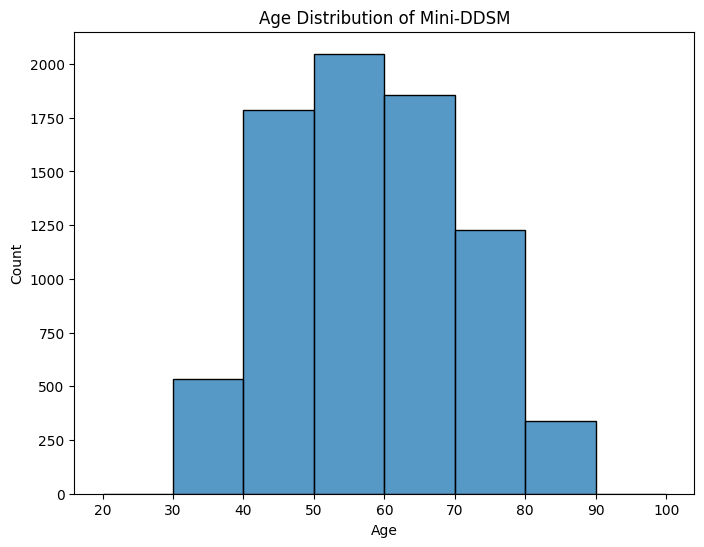

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('/content/drive/Shareddrives/COS429_Final_Project/Data.xlsx')
df = df[df['Age'] >= 30]
df = df[df['Age'] <= 90]
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
sns.histplot(data=df, x='Age', bins=bins)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Mini-DDSM')
plt.show()


In [135]:
df = pd.read_excel('/content/drive/Shareddrives/COS429_Final_Project/Data.xlsx')
df = df[df['Age'] >= 30]
df = df[df['Age'] <= 90]
df = df.reset_index(drop = True)
normal = np.zeros(2)
benign = np.zeros(2)
cancer = np.zeros(2)
for i in range(len(df)):
  age_index = 1
  if df['Age'][i] <= 39:
    age_index = 0
  if df['Status'][i] == 'Normal':
    normal[age_index] += 1
  if df['Status'][i] == 'Benign':
    benign[age_index] += 1
  if df['Status'][i] == 'Cancer':
    cancer[age_index] += 1
print(normal, benign, cancer)

[ 104. 2304.] [ 328. 2348.] [ 104. 2604.]


In [ ]:
counts, bins = np.histogram(df['Age'], bins=bins)
max_count = counts.max()
print(max_count)

2048


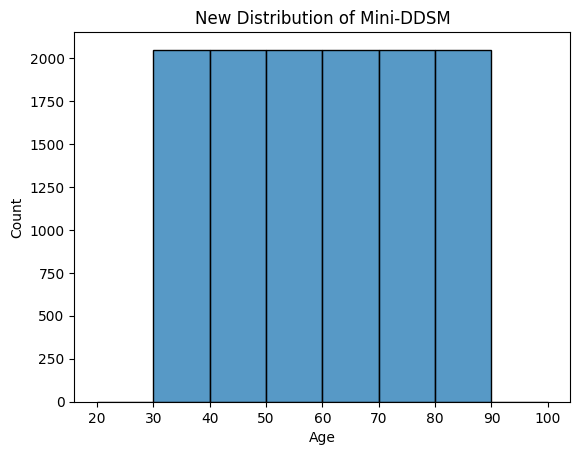

In [ ]:
data = [30] * 2048 + [40] * 2048 + [50] * 2048 + [60] * 2048 + [70] * 2048 + [80] * 2048
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
sns.histplot(data, bins=bins)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('New Distribution of Mini-DDSM')
plt.show()

In [ ]:
# For PNG
# name_dataset = "/content/drive/Shareddrives/COS429 Final Project/MINI-DDSM-Complete-PNG-16"
# def create_df(name_dataset):
#     is_cancer = {'Benign': 1, 'Cancer': 1, 'Normal': 0}
#     data = {'patient_id': [], 'image_id':[],'Age':[], 'Density': [], 'cancer':[], 'view': [], 'laterality': [], 'Path': [], 'Path_local': [], 'Label': []}
#     # extract the path and view
#     paths = glob(f"{name_dataset}/*/*")
#     for head in tqdm(paths, desc="Loading MINI-DDSM dataset"):
#         path = glob(f"{head}/*")
#         path_ics = [x for x in path if "ics" in x][0]
#         path_img = [x for x in path if ("png" in x and 'MASK' not in x.upper())]
#         if len(path_img) >= 1:
#             # get information from file *.png
#             for txt in path_img:
#                 view = txt.split('.')[-2].split('_')[1]
#                 laterality = txt.split('.')[-2].split('_')[0]
#                 data['view'].append(view)
#                 data['laterality'].append('L' if laterality=='LEFT' else 'R')
#                 data['Path'].append(txt)
#                 data['Path_local'].append(txt)
#                 if 'Normal' in txt:
#                   data['Label'].append(0)
#                 if 'Benign' in txt:
#                   data['Label'].append(1)
#                 if 'Cancer' in txt:
#                   data['Label'].append(2)
#                 data['cancer'].append(is_cancer[head.split('/')[-2]])
#                 data['patient_id'].append(txt.split('/')[-2])
#                  # get information from file *.ics
#                 f = open(path_ics, "r")
#                 ics_text = f.read().strip().split("\n")
#                 for txt in ics_text:
#                     if txt.split()[0].upper() == 'FILENAME':
#                         data['image_id'].append(txt.split()[1] if len(txt.split()) > 1 else 'NaN')
#                     if txt.split()[0].upper() == 'PATIENT_AGE':
#                         data['Age'].append(txt.split()[1] if len(txt.split()) > 1 else 'NaN')
#                     if txt.split()[0].upper() == 'DENSITY':
#                         data['Density'].append(txt.split()[1] if len(txt.split()) > 1 else 'NaN')
#     return pd.DataFrame(data)
# s = time.time()
# df = create_df(name_dataset)
# e = time.time()
# print(f'Time running: {e-s}')

In [ ]:
# For JPEG
name_dataset = "/content/drive/Shareddrives/COS429 Final Project/MINI-DDSM-Complete-JPEG-8"
def create_df(name_dataset):
    is_cancer = {'Benign': 1, 'Cancer': 1, 'Normal': 0}
    data = {'patient_id': [], 'image_id':[],'Age':[], 'AgeIndex': [], 'Density': [], 'cancer':[], 'view': [], 'laterality': [], 'Path': [], 'Path_local': [], 'Label': []}
    # extract the path and view
    paths = glob(f"{name_dataset}/*/*")
    for head in tqdm(paths, desc="Loading MINI-DDSM dataset"):
        path = glob(f"{head}/*")
        path_ics = [x for x in path if "ics" in x][0]
        path_img = [x for x in path if ("jpg" in x and 'MASK' not in x.upper())]
        if len(path_img) >= 1:
            # get information from file *.jpg
            for txt in path_img:
                view = txt.split('.')[-2].split('_')[1]
                laterality = txt.split('.')[-2].split('_')[0]
                data['view'].append(view)
                data['laterality'].append('L' if laterality=='LEFT' else 'R')
                data['Path'].append(txt)
                data['Path_local'].append(txt)
                if 'Normal' in txt:
                  data['Label'].append(0)
                if 'Benign' in txt:
                  data['Label'].append(1)
                if 'Cancer' in txt:
                  data['Label'].append(2)
                data['cancer'].append(is_cancer[head.split('/')[-2]])
                data['patient_id'].append(txt.split('/')[-2])
                 # get information from file *.ics
                f = open(path_ics, "r")
                ics_text = f.read().strip().split("\n")
                for txt in ics_text:
                    if txt.split()[0].upper() == 'FILENAME':
                        data['image_id'].append(txt.split()[1] if len(txt.split()) > 1 else 'NaN')
                    if txt.split()[0].upper() == 'PATIENT_AGE':
                        data['Age'].append(txt.split()[1] if len(txt.split()) > 1 else 'NaN')
                        age_index = int(data['Age'][-1]) // 10 if len(txt.split()) > 1 else 'NaN'
                        data['AgeIndex'].append(age_index)
                    if txt.split()[0].upper() == 'DENSITY':
                        data['Density'].append(txt.split()[1] if len(txt.split()) > 1 else 'NaN')
    return pd.DataFrame(data)
s = time.time()
df = create_df(name_dataset)
e = time.time()
print(f'Time running: {e-s}')

Loading MINI-DDSM dataset: 0it [00:00, ?it/s]

Time running: 0.02242732048034668


In [ ]:
df.head()

,patient_id,image_id,Age,AgeIndex,Density,cancer,view,laterality,Path,Path_local,Label


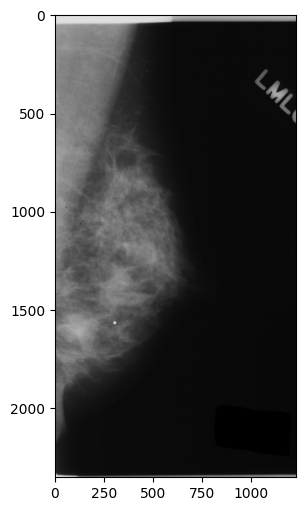

In [ ]:
# Young: VGG correctly identifies Cancer (age 34)
image = cv2.imread('/content/drive/Shareddrives/COS429_Final_Project/MINI-DDSM-Complete-JPEG-8/Cancer/0153/C_0153_1.LEFT_MLO.jpg')
plt.imshow(image)

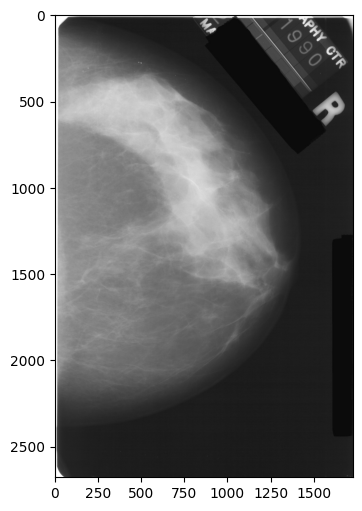

In [ ]:
def increase_contrast_bright(image, contrast:float=1, brightness:int=10):
    """
    Adjusts contrast and brightness of an uint8 image.
    contrast:   (0.0,  inf) with 1.0 leaving the contrast as is
    brightness: [-255, 255] with 0 leaving the brightness as is
    """
    brightness += int(round(255*(1-contrast)/2))
    return cv2.addWeighted(image, contrast, image, 0, brightness)

plt.imshow(increase_contrast_bright(image))

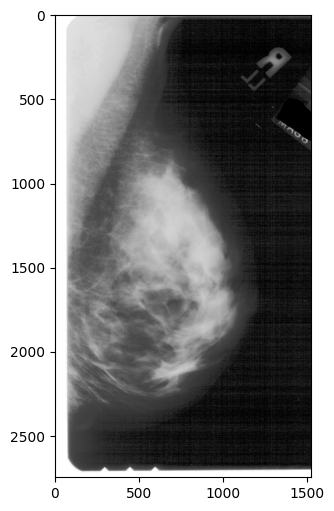

In [ ]:
def increase_contrast(image, factor=2):
   # read the image and convert it to grayscale
    gray = (image).astype(np.uint8)

    # calculate the histogram of the grayscale image
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

    # calculate the cumulative distribution function of the histogram
    cdf = hist.cumsum()

    # normalize the cdf so that it ranges from 0 to 1
    cdf_normalized = cdf / cdf.max()

    # calculate the new pixel values using the contrast enhancement factor
    new_values = np.round(((cdf_normalized ** factor) * 255)).astype('uint8')

    # map the new pixel values to the original image and return the result
    return (cv2.LUT(gray, new_values)).astype(float) / 255

plt.imshow(increase_contrast(image))

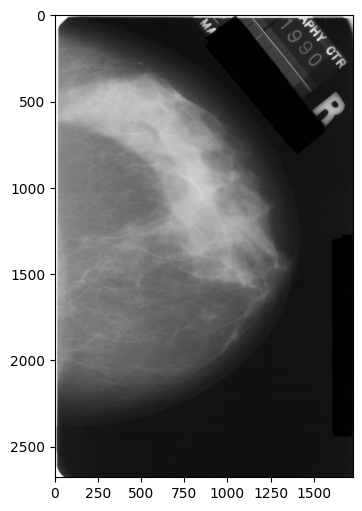

In [ ]:
# Young: VGG correctly identifies Benign (36)
image = cv2.imread('/content/drive/Shareddrives/COS429_Final_Project/MINI-DDSM-Complete-JPEG-8/Benign/1301/A_1301_1.RIGHT_CC.jpg')
plt.imshow(image)

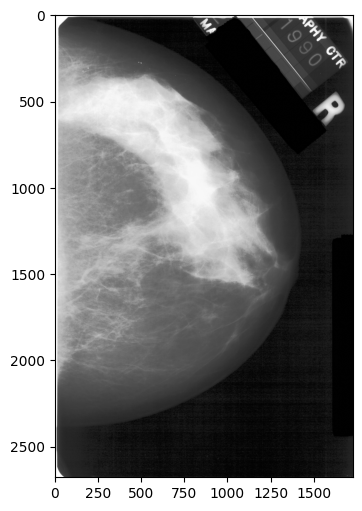

In [ ]:
plt.imshow(increase_contrast(image, 2))

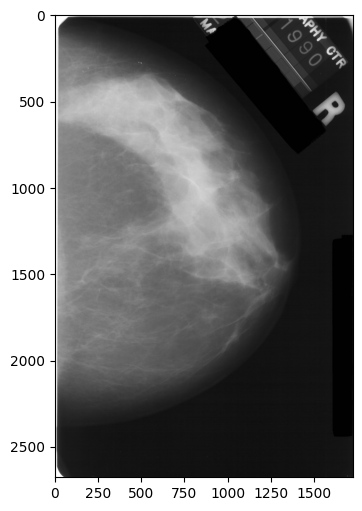

In [ ]:
a = image_processing(image)
plt.imshow(a, cmap='gray')

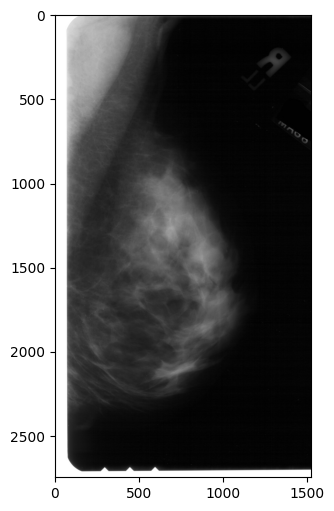

In [ ]:
# Young: VGG incorrectly identifies Cancer as Benign (age 33)
image = cv2.imread('/content/drive/Shareddrives/COS429_Final_Project/MINI-DDSM-Complete-JPEG-8/Cancer/1698/A_1698_1.RIGHT_MLO.jpg')
plt.imshow(image)

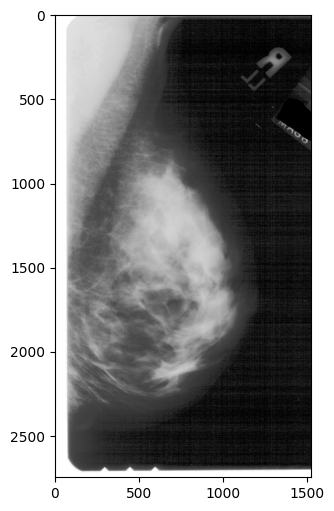

In [ ]:
plt.imshow(increase_contrast(image, 2))

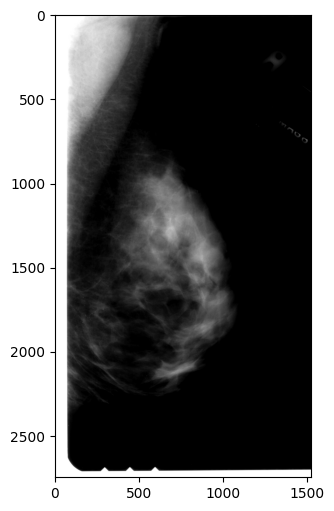

In [ ]:
plt.imshow(increase_contrast_bright(image, 1.5))

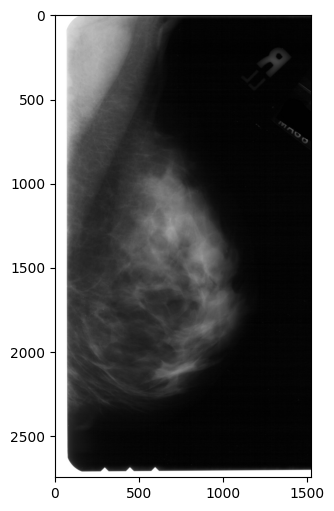

In [ ]:
image = cv2.imread('/content/drive/Shareddrives/COS429_Final_Project/MINI-DDSM-Complete-JPEG-8/Cancer/1698/A_1698_1.RIGHT_MLO.jpg')
a = image_processing(image)
plt.imshow(a, cmap='gray')

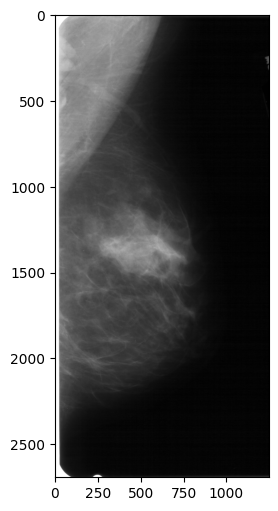

In [ ]:
# Young: VGG incorrectly identifies Benign as Cancer (38)
image = cv2.imread('/content/drive/Shareddrives/COS429_Final_Project/MINI-DDSM-Complete-JPEG-8/Benign/1268/A_1268_1.RIGHT_MLO.jpg')
plt.imshow(image)

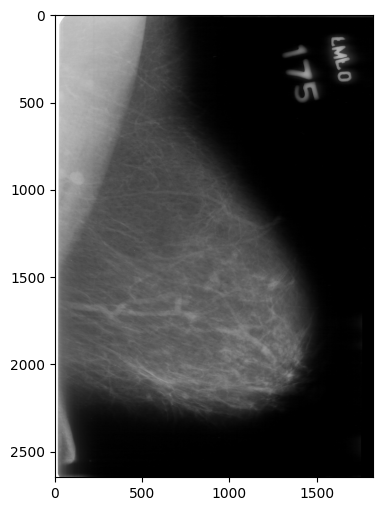

In [ ]:
# Old: VGG correctly identifies Cancer (65)
image = cv2.imread('/content/drive/Shareddrives/COS429_Final_Project/MINI-DDSM-Complete-JPEG-8/Cancer/4021/D_4021_1.LEFT_MLO.jpg')
plt.imshow(image)

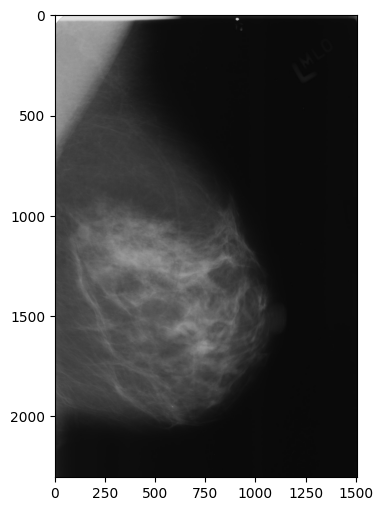

In [ ]:
# Old: VGG correctly identifies Benign (45)
image = cv2.imread('/content/drive/Shareddrives/COS429_Final_Project/MINI-DDSM-Complete-JPEG-8/Benign/3366/B_3366_1.LEFT_MLO.jpg')
plt.imshow(image)

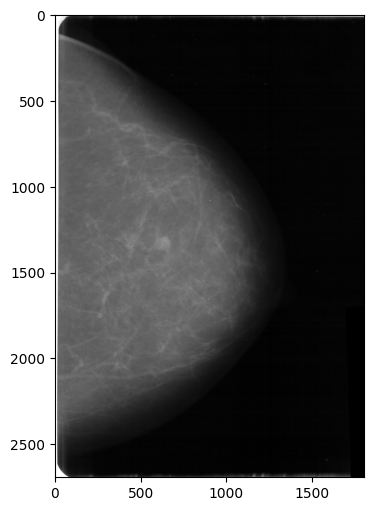

In [ ]:
# Old: VGG incorrectly identifies Cancer as Benign (73)
image = cv2.imread('/content/drive/Shareddrives/COS429_Final_Project/MINI-DDSM-Complete-JPEG-8/Cancer/4109/D_4109_1.LEFT_CC.jpg')
plt.imshow(image)

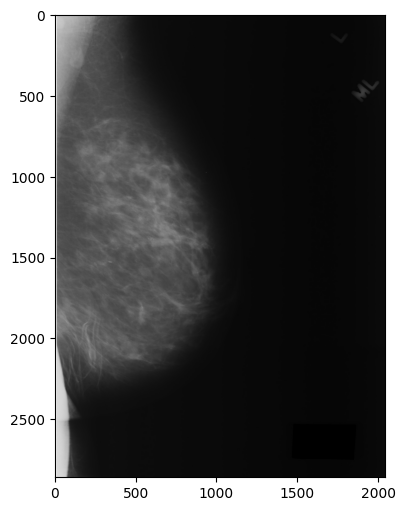

In [ ]:
# Old: VGG incorrectly identifies Benign as Cancer (52)
image = cv2.imread('/content/drive/Shareddrives/COS429_Final_Project/MINI-DDSM-Complete-JPEG-8/Benign/0288/C_0288_1.LEFT_MLO.jpg')
plt.imshow(image)

In [ ]:
# Create training and testing data splits
# Load the image filenames and labels from a dataframe
df = df[df['Age'] != 'NaN']
filenames = df['Path'].values
labels = df['Label'].values
ages = df['AgeIndex'].astype(str).values

# One hot encode the labels
labels = to_categorical(labels, num_classes=3)
# Create training and testing splits
(train_X, test_X, train_Y, test_Y) = train_test_split(filenames, labels, test_size= 0.20, random_state= 4342, stratify=ages)

In [ ]:
import cv2 
import scipy
import torch
import numpy as np
import pandas as pd
from PIL import Image
import os, sys, tarfile
from skimage import filters
from skimage.io import imread
from tqdm.notebook import tqdm
from collections import Counter
import matplotlib.pyplot as plt
from skimage.draw import polygon
from torchvision.io import read_image

In [ ]:
def get_masks_and_sizes_of_connected_components(img_mask):
    """
    Finds the connected components from the mask of the image
    """
    mask, num_labels = scipy.ndimage.label(img_mask)

    mask_pixels_dict = {}
    for i in range(num_labels+1):
        this_mask = (mask == i)
        if img_mask[this_mask][0] != 0:
            # Exclude the 0-valued mask
            mask_pixels_dict[i] = np.sum(this_mask)
        
    return mask, mask_pixels_dict

def get_mask_of_largest_connected_component(img_mask):
    """
    Finds the largest connected component from the mask of the image
    """
    mask, mask_pixels_dict = get_masks_and_sizes_of_connected_components(img_mask)
    largest_mask_index = pd.Series(mask_pixels_dict).idxmax()
    largest_mask = mask == largest_mask_index
    return largest_mask

def image_processing(img):
    """
    Crop image by find coordinates of the largest connected componen
    """
    
    threshold = filters.threshold_isodata(img)
    bin_img = (img > threshold)*1
    kernel = np.ones((5, 5), np.uint8)
    bin_img = bin_img.astype('uint8')
    bin_img = cv2.erode(bin_img, kernel, iterations=-2)
    
    #most mask
    img_mask = get_mask_of_largest_connected_component(bin_img)
    #crop_image
    
    farest_pixel = np.max(list(zip(*np.where(img_mask == 1))), axis=0)
    nearest_pixel = np.min(list(zip(*np.where(img_mask == 1))), axis=0)
    cropped =  img[nearest_pixel[0]:farest_pixel[0], nearest_pixel[1]:farest_pixel[1]]
    return cropped

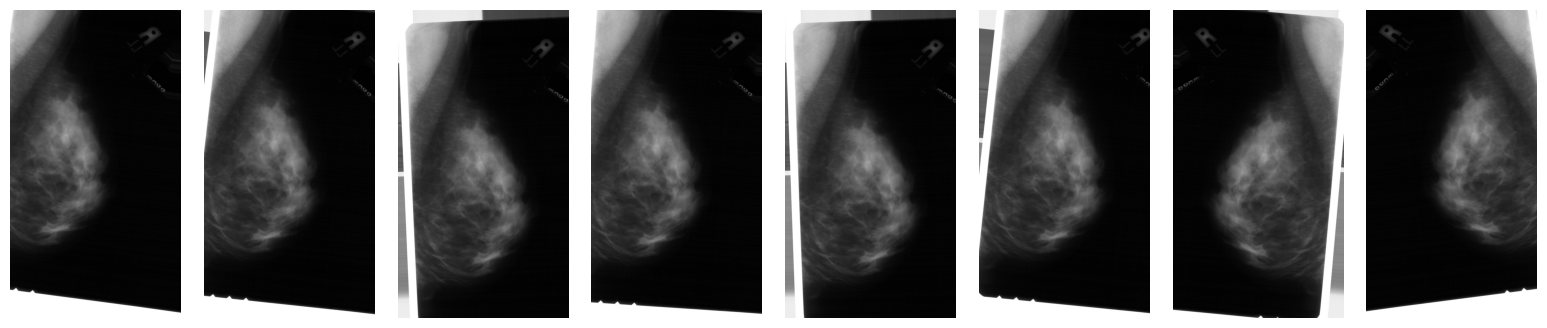

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.01,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.01,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode="nearest")

# Load the image
img = cv2.imread('/content/drive/Shareddrives/COS429_Final_Project/MINI-DDSM-Complete-JPEG-8/Cancer/1698/A_1698_1.RIGHT_MLO.jpg')

# Convert the image to a numpy array
x = np.expand_dims(img, axis=0)

# Generate augmented images and display a 2x8 grid
fig, ax = plt.subplots(1, 8, figsize=(20, 4), gridspec_kw={'wspace': 0})
for i in range(8):
    # Generate augmented image
    aug_img = datagen.flow(x, batch_size=1)[0]
    aug_img = aug_img.astype(np.uint8)
        
    # Display the augmented image
    ax[i].imshow(aug_img.squeeze())
    ax[i].axis("off")
plt.show()

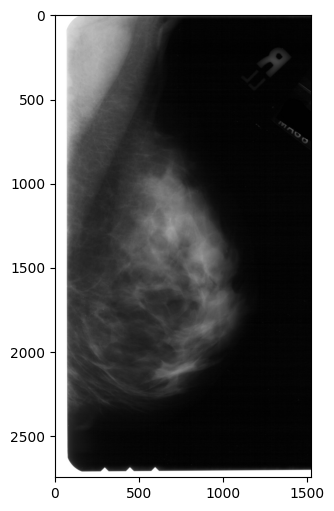

In [ ]:
image = cv2.imread('/content/drive/Shareddrives/COS429_Final_Project/MINI-DDSM-Complete-JPEG-8/Cancer/1698/A_1698_1.RIGHT_MLO.jpg')
a = image_processing(image)
plt.imshow(a, cmap='gray')

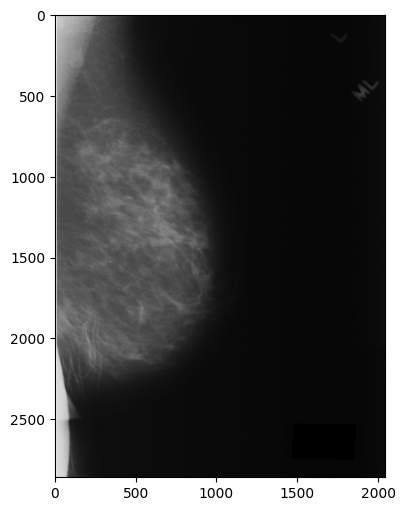

In [ ]:
img = cv2.imread('/content/drive/Shareddrives/COS429_Final_Project/MINI-DDSM-Complete-JPEG-8/Benign/0288/C_0288_1.LEFT_MLO.jpg',0)
# img = img[20:-20, 20:-20]
plt.imshow(img, cmap='gray')

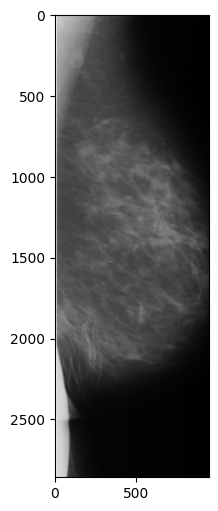

In [ ]:
a = image_processing(img)
plt.imshow(a, cmap='gray')

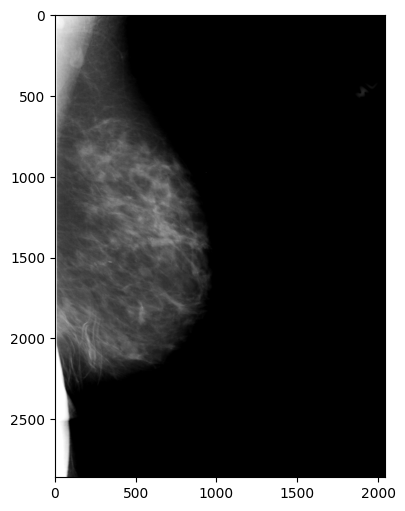

In [ ]:
plt.imshow(increase_contrast_bright(img, 1.5), cmap='gray')

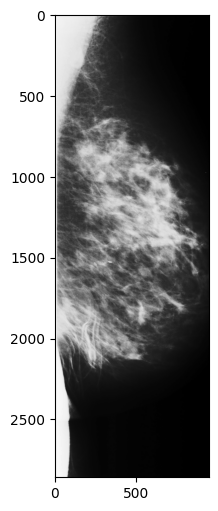

In [ ]:
plt.imshow(increase_contrast(a, 2.5), cmap='gray')

In [ ]:
image = cv2.imread('/content/drive/Shareddrives/COS429_Final_Project/MINI-DDSM-Complete-JPEG-8/Cancer/4109/D_4109_1.LEFT_CC.jpg',0)
a = image_processing(increase_contrast(image))
plt.imshow(a, cmap='gray')
# plt.imshow(image)

NameError: ignored

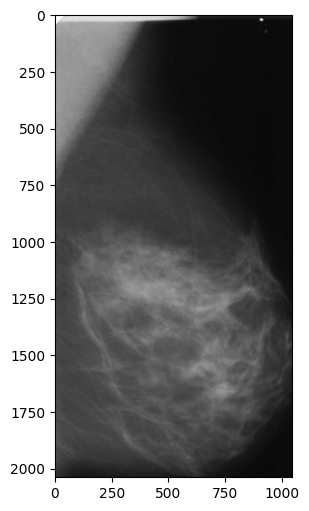

In [ ]:
image = cv2.imread('/content/drive/Shareddrives/COS429_Final_Project/MINI-DDSM-Complete-JPEG-8/Benign/3366/B_3366_1.LEFT_MLO.jpg')
a = image_processing(image)
plt.imshow(a)

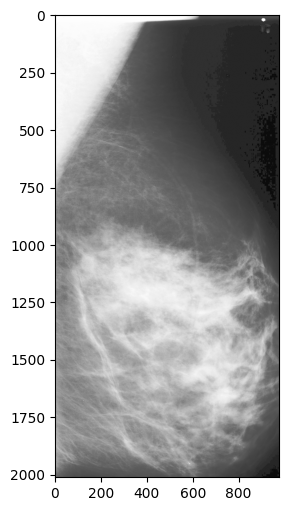

In [ ]:
image = cv2.imread('/content/drive/Shareddrives/COS429_Final_Project/MINI-DDSM-Complete-JPEG-8/Benign/3366/B_3366_1.LEFT_MLO.jpg')
a = image_processing(increase_contrast(image))
plt.imshow(a)

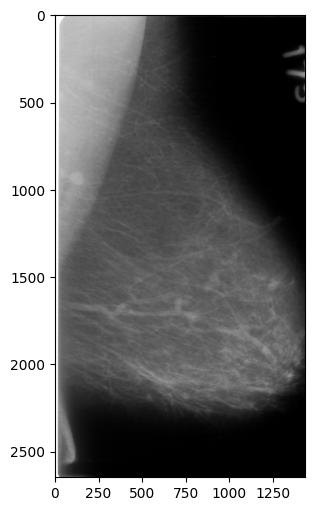

In [ ]:
image = cv2.imread('/content/drive/Shareddrives/COS429_Final_Project/MINI-DDSM-Complete-JPEG-8/Cancer/4021/D_4021_1.LEFT_MLO.jpg')
a = image_procescing(image)
plt.imshow(a)

In [ ]:
# Functions for loading in data
# Define a generator to load the images one at a time from the directory
def image_generator(filenames, labels, batch_size):
    while True:
        # Get the next batch of images and labels
        indices = np.random.randint(0, len(filenames), batch_size)
        batch_filenames = filenames[indices]
        batch_labels = labels[indices]
        x = []
        y = []
        for i in range(batch_size):
            # Load the image and resize it to the desired shape
            image = load_img(batch_filenames[i], target_size=(224, 224))
            image = img_to_array(image) / 255.0
            x.append(image)
            # Load the corresponding label
            label = batch_labels[i]
            y.append(label)
        x = np.array(x)
        y = np.array(y)
        # Yield the batch of images and labels
        yield x, y

In [ ]:
# Get Accuracies by Age
def get_accuracies_by_age(data):
  num_bins = 11
  bin_ranges = np.linspace(0, 100, num_bins)
  total_amount = np.zeros(num_bins - 1)
  correct_amount = np.zeros(num_bins - 1)
  for i in range(len(data)):
    label = data['Label'][i]
    prediction = data['Prediction'][i]
    age = float(data['Age'][i])
    age_index = -1
    for j in range(len(bin_ranges) - 1):
      if age >= bin_ranges[j] and age < bin_ranges[j + 1]:
        age_index = j
        break
    total_amount[age_index] += 1
    if label == prediction:
      correct_amount[age_index] += 1
    total_amount[0] = 1
    total_amount[1] = 1
  return correct_amount / total_amount

# Get Accuracies by Density
def get_accuracies_by_density(data):
  bin_ranges = np.arange(int(min(data['Density'])), int(max(data['Density'])) + 1)
  total_amount = np.zeros(len(bin_ranges))
  correct_amount = np.zeros(len(bin_ranges))
  for i in range(len(data)):
    label = data['Label'][i]
    prediction = data['Prediction'][i]
    density = int(data['Density'][i])
    for j in range(len(bin_ranges)):
      if density == bin_ranges[j]:
        total_amount[j] += 1
        if label == prediction:
          correct_amount[j] += 1
        break
  return correct_amount / total_amount